<a href="https://colab.research.google.com/github/thkted/DeepLearning_Study/blob/%EB%AA%A8%EB%91%90%EC%9D%98-%EB%94%A5%EB%9F%AC%EB%8B%9D/%EB%AA%A8%EB%91%90%EC%9D%98%EB%94%A5%EB%9F%AC%EB%8B%9D/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nondeterministic world!

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [2]:
env = gym.make('FrozenLake-v0')

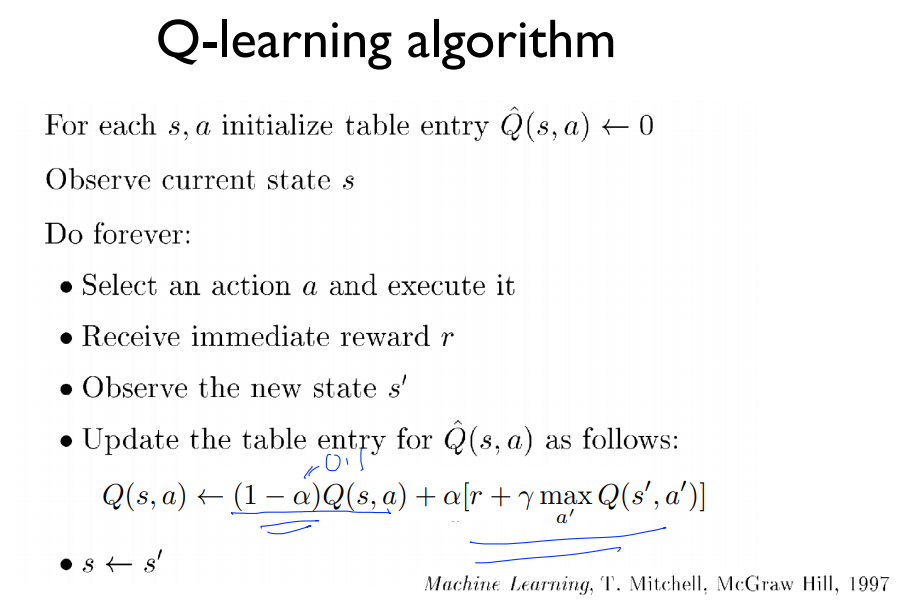

In [3]:
# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n]) 

In [4]:
# Set learning parameters
num_episodes = 10000
dis = 0.99
learning_rate = 0.85

Random Noise

In [5]:
# Create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
  # Reset environment and get first new observation
  state = env.reset()
  rAll = 0
  done = False

  while not done:

    #random noise action
    action = np.argmax(Q[state,:] + np.random.randn(1, env.action_space.n) / (i + 1))

    # Get new state and reward from environment
    new_state, reward, done, _ = env.step(action)

    # Update Q-Table with new knowledge using learning rate
    Q[state, action] = (1-learning_rate) * Q[state,action] + \
    learning_rate * (reward + dis * np.max(Q[new_state, :]))

    rAll += reward
    state = new_state
  
  rList.append(rAll)

Success rate: 0.5233
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0.00000000e+00 6.01573259e-03 7.25239656e-01 1.03049066e-02]
 [1.91606065e-03 2.02824662e-03 1.61268778e-03 3.31199077e-01]
 [1.61659347e-03 3.93382925e-03 3.16588107e-03 1.79851898e-01]
 [8.79096079e-05 5.73516278e-05 1.25458484e-03 1.36701743e-01]
 [7.57726845e-01 0.00000000e+00 1.19714081e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.76273279e-04 2.56067362e-07 4.64060296e-07 7.63948551e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 8.88276098e-01]
 [1.77658619e-04 9.50209491e-01 9.68433170e-05 0.00000000e+00]
 [1.44647124e-01 5.17862947e-06 1.21668863e-05 1.44447259e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.77274638e-03 9.82797117e-01 1.61906468e-03]
 [0.00000000e+00 9.99382449e-01 0.00000000e+00 0.00000000

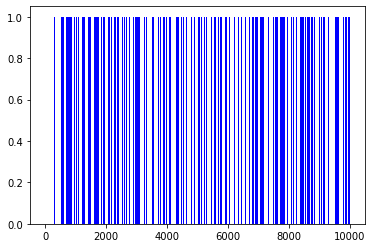

In [6]:
print('Success rate: ' + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

E-Greedy

In [7]:
# Create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
  # Reset environment and get first new observation
  state = env.reset()
  rAll = 0
  done = False

  # The E-greedy algorithm
  while not done:
    e = 1. / ((i // 100) + 1)

    if np.random.rand(1) < e:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])

    # Get new state and reward from environment
    new_state, reward, done, _ = env.step(action)

    # Update Q-Table with new knowledge using learning rate
    Q[state, action] = (1-learning_rate) * Q[state,action] + \
    learning_rate * (reward + dis * np.max(Q[new_state, :]))

    rAll += reward
    state = new_state
  
  rList.append(rAll)

Success rate: 0.349
Final Q-Table Values
LEFT DOWN RIGHT UP
[[2.28725217e-01 1.56495541e-01 1.49104891e-01 1.44210141e-01]
 [2.72420721e-02 8.60693072e-02 3.42609551e-02 6.26300221e-01]
 [5.77353605e-02 5.75843173e-02 1.48437312e-01 4.11570040e-01]
 [1.54995907e-02 2.40175791e-03 3.04641291e-03 2.08704123e-01]
 [7.37412649e-02 3.08577660e-02 1.27440748e-02 1.26910541e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.46069287e-04 1.56639011e-05 3.45547973e-01 5.32989150e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.05255851e-03 2.33395461e-02 8.46271569e-03 7.84615079e-02]
 [1.74206104e-02 5.48012053e-02 2.33420667e-02 1.88187972e-02]
 [8.51208689e-02 2.47680692e-03 2.60786260e-03 7.21075225e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.37762698e-02 8.63416238e-02 6.13996744e-01 1.46726531e-02]
 [7.89641746e-01 8.43939584e-01 2.53906782e-01 2.92153907e

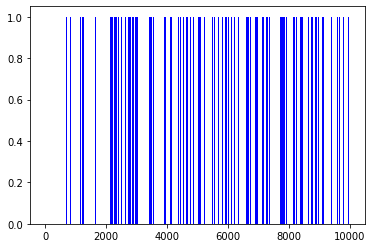

In [8]:
print('Success rate: ' + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()